In [1]:
##importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
##importing data and ndo some quick cleaning
df = pd.read_csv('hnp_stats_csv/HNP_StatsData.csv')
df['Mean']=df.iloc[:,4:-1].mean(axis=1)
df=df[['Country Code', 'Indicator Name', 'Mean']]
countrycode = df['Country Code'].unique()

##cleaning the data to just look at the mean of the annual data on the different indicators for all countries
countrydf = []
for country in countrycode:
    tempdf = df[df['Country Code']==country]
    tempdf.set_index('Indicator Name', inplace=True)
    tempdf.drop('Country Code', axis=1, inplace=True)
    tempdf.columns=[country]
    tempdf=tempdf.transpose()
    countrydf.append(tempdf)

/Users/chuanfuyap/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [3]:
df2 = pd.concat(countrydf).fillna(0)

In [4]:
df2.describe()

Indicator Name,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female","Age at first marriage, male",Age dependency ratio (% of working-age population),...,Unmet need for contraception (% of married women ages 15-49),Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),Use of insecticide-treated bed nets (% of under-5 population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
count,259.000000,259.000000,259.000000,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,259.000000,259.000000,259.000000,...,259.000000,2.590000e+02,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,10.893076,9.413160,69.692289,2.000123e+05,1.874383e+04,1.894400e+05,1.632918e+04,19.453010,22.440235,65.429116,...,12.250685,7.350751e+07,48.879014,2.947196,9.967786,6.542911,4.011482,21.965322,1.334464,24.144425
std,15.851345,16.169004,49.979195,1.708829e+06,1.597381e+05,1.588594e+06,1.383673e+05,9.433321,10.808139,25.805036,...,11.464656,2.367479e+08,24.097678,1.730311,15.313995,13.391982,10.900367,31.452226,1.874320,22.494298
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,-0.452439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.716499,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.012500,24.293750,53.363871,...,0.000000,3.580211e+05,29.826281,1.474313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,65.002030,2.296296e+02,1.000000e+02,2.370370e+02,1.000000e+02,22.566667,26.611111,70.838315,...,11.100000,2.676857e+06,48.067298,3.004967,0.000000,0.000000,0.000000,0.000000,0.000000,27.478071
75%,18.450000,19.025000,101.344475,2.173148e+04,2.233333e+03,2.194444e+04,2.138889e+03,25.314286,28.495588,85.094186,...,21.795887,1.643571e+07,67.599759,4.219472,20.233333,1.000000,0.000000,50.764013,2.637500,44.133836
max,72.600000,60.600000,218.347971,2.693704e+07,2.514815e+06,2.502963e+07,2.177778e+06,31.125000,34.425000,103.719306,...,55.900000,2.270979e+09,100.000000,8.495063,62.000000,51.620000,65.983333,98.687500,7.000000,67.188360


Plotting correlations to quickly view any variables are related numerically.

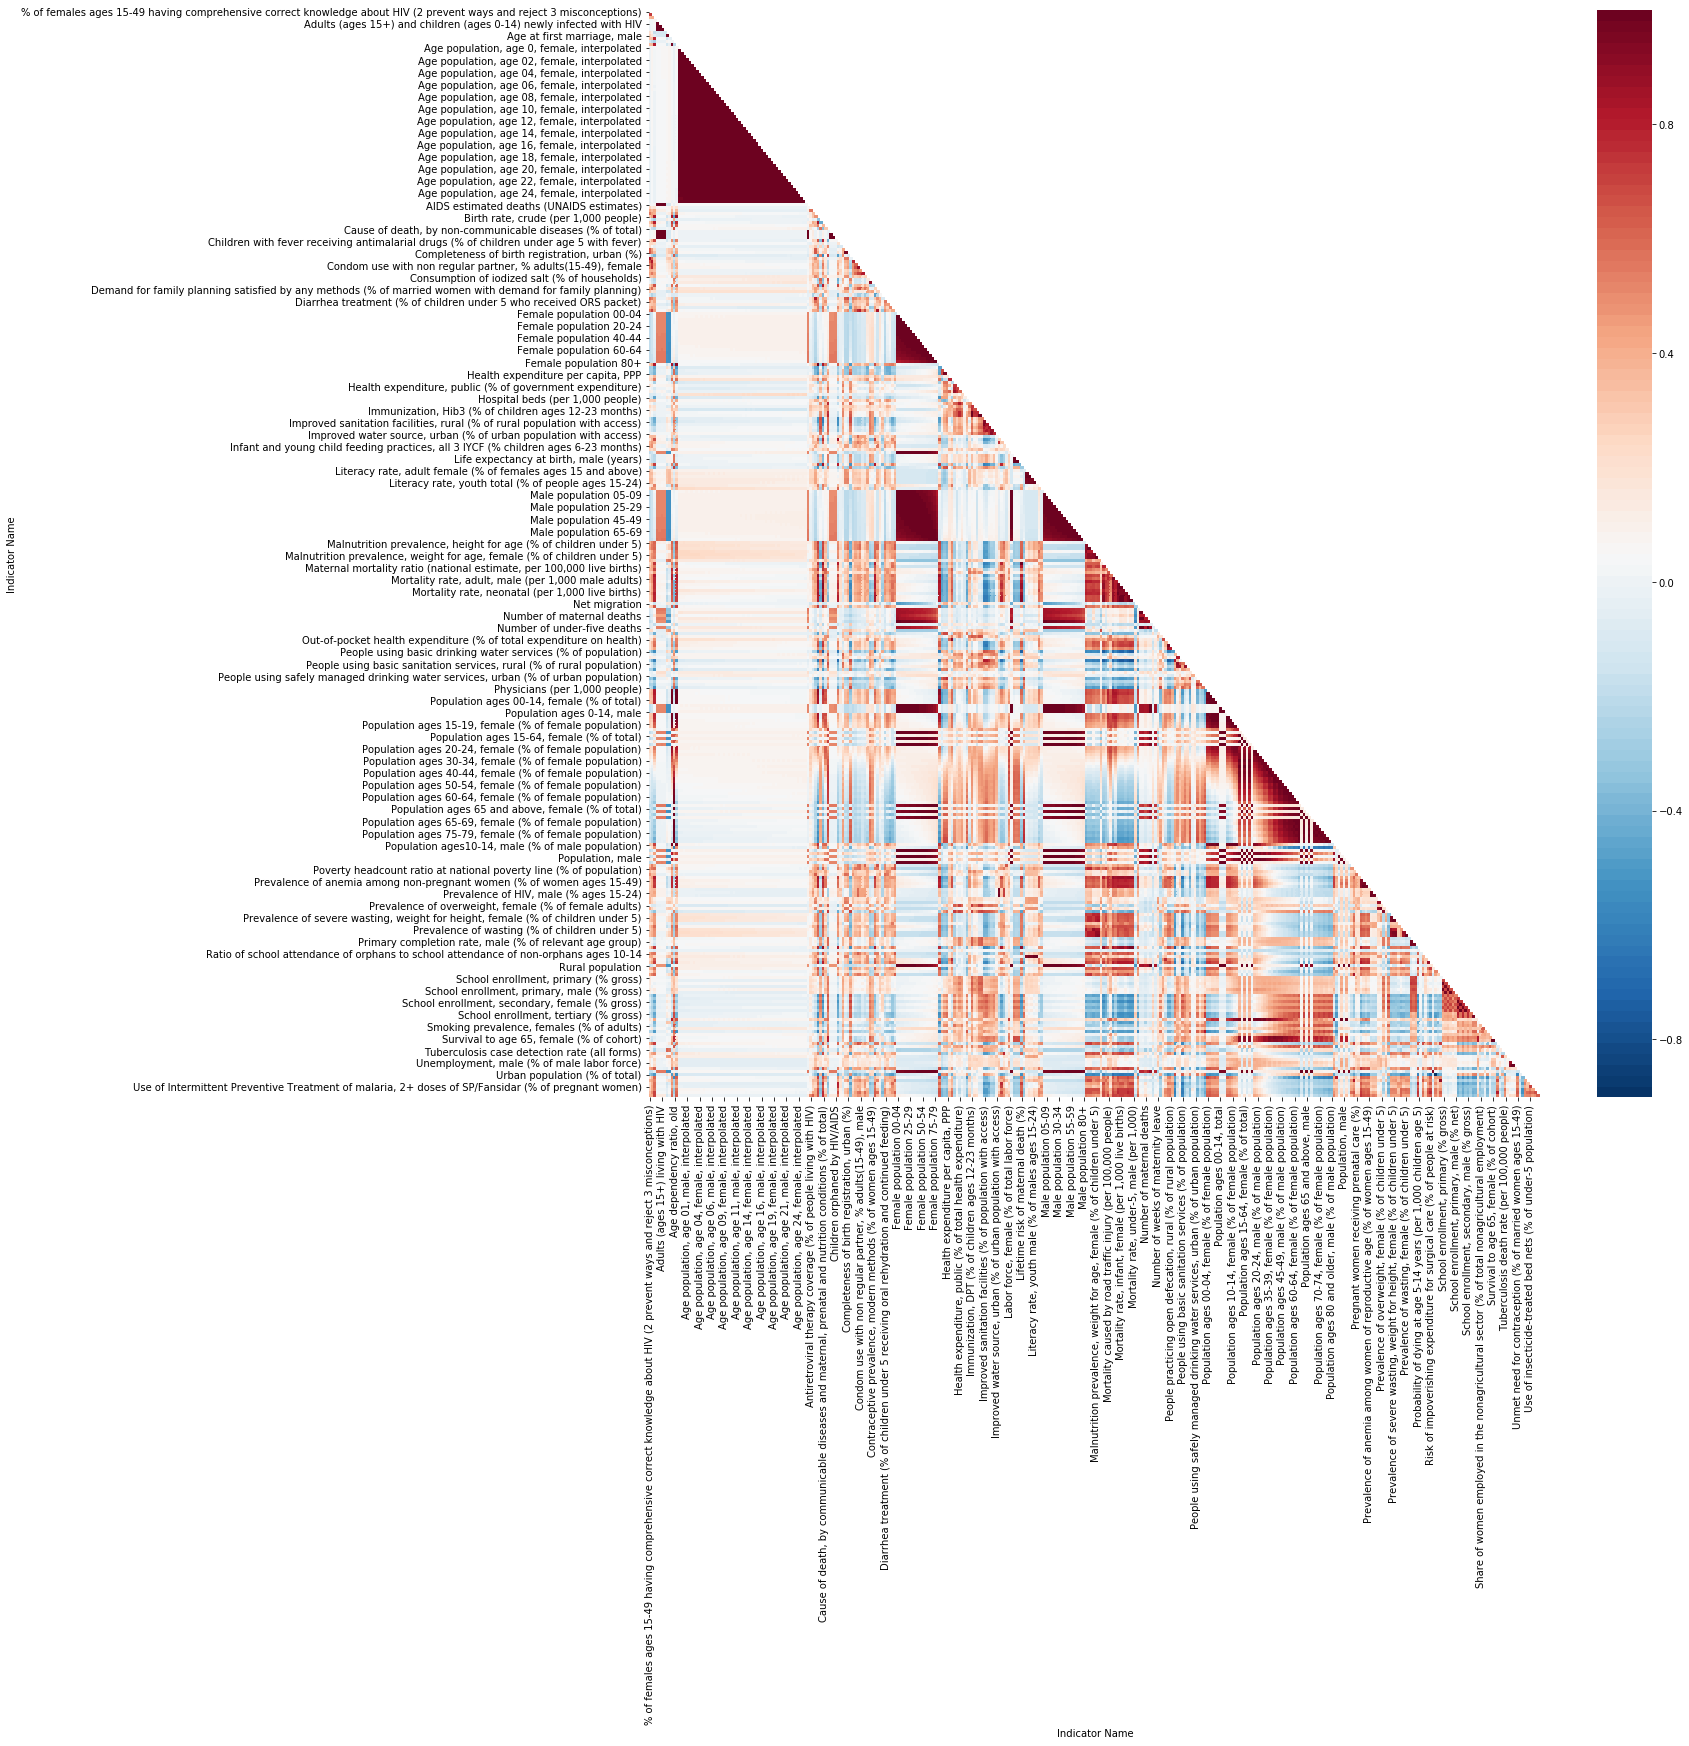

In [5]:
correlations = df2.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(correlations,cmap=sns.color_palette("RdBu_r", 100),  mask=mask)

At a glance its really hard to take in all the information, so lets focus on a few related indicators.

Let's start with an obvious one, increased literacy rate would mean the country would have better access to clean water as they are more developed.

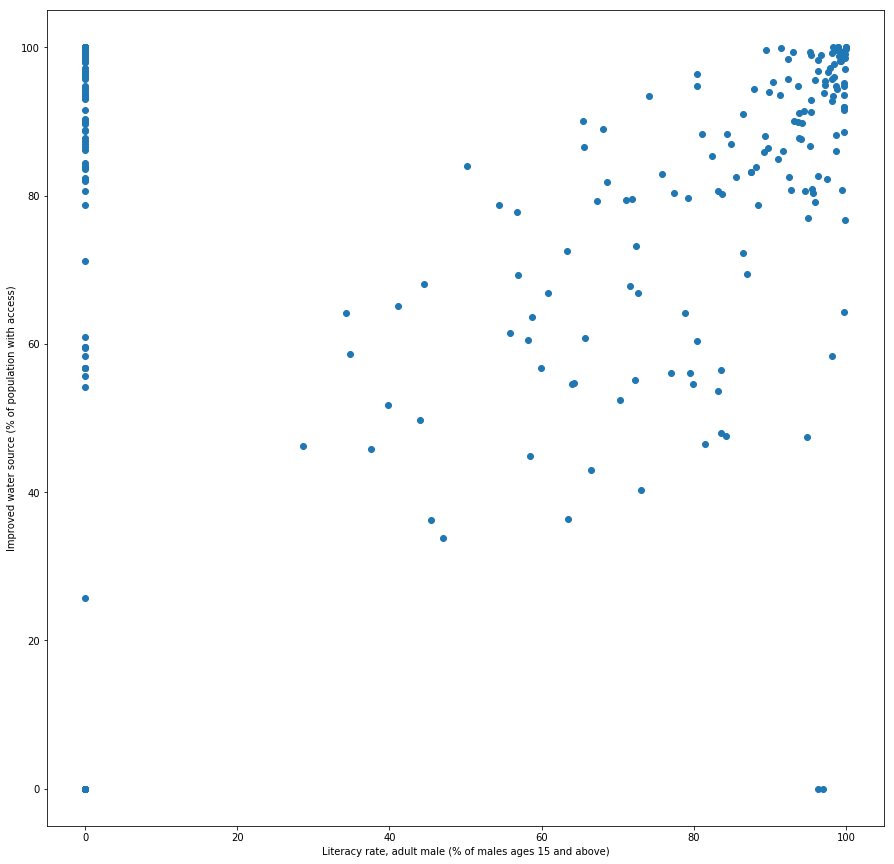

In [6]:
x = df2['Literacy rate, adult male (% of males ages 15 and above)']
y = df2['Improved water source (% of population with access)']
plt.figure(figsize=(15, 15))
plt.scatter(x, y)
plt.xlabel('Literacy rate, adult male (% of males ages 15 and above)')
plt.ylabel('Improved water source (% of population with access)')

Looking at other indicators, surprisingly, increased urban population does not mean improved health expenditure and hospital beds. They have very little correlation be it postive or negative. (note to ignore zeros, as they are likely missing data which I have filled as zero earlier as part of quick data cleaning process)

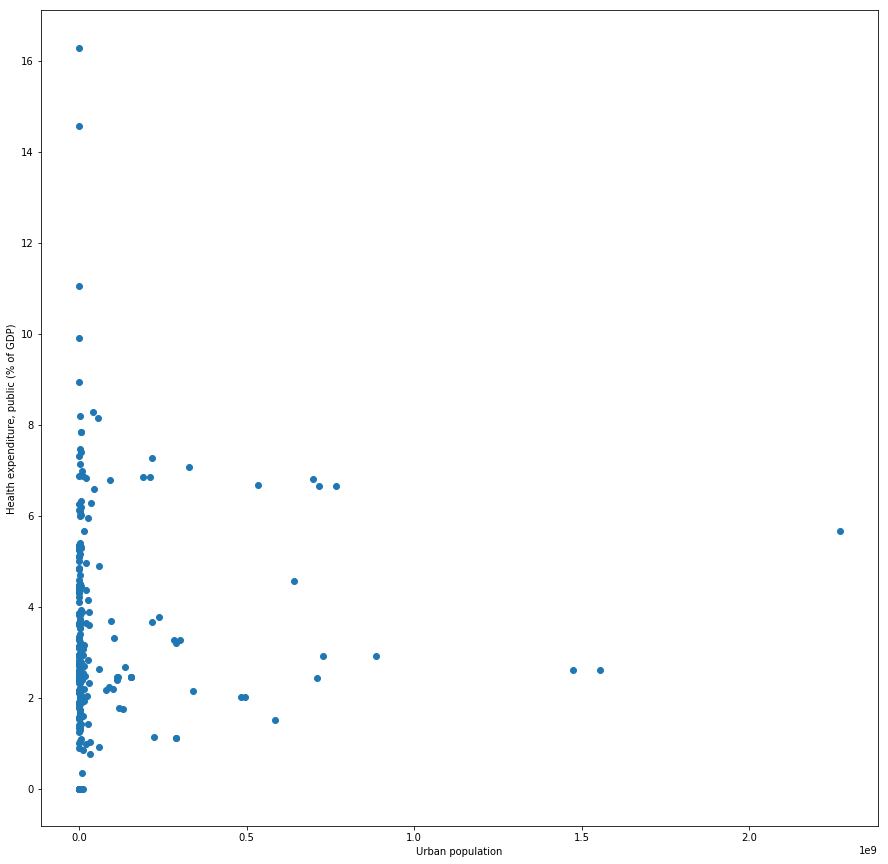

In [7]:
x = df2['Urban population']
y = df2['Health expenditure, public (% of GDP)']
plt.figure(figsize=(15, 15))
plt.scatter(x, y)
plt.xlabel('Urban population')
plt.ylabel('Health expenditure, public (% of GDP)')

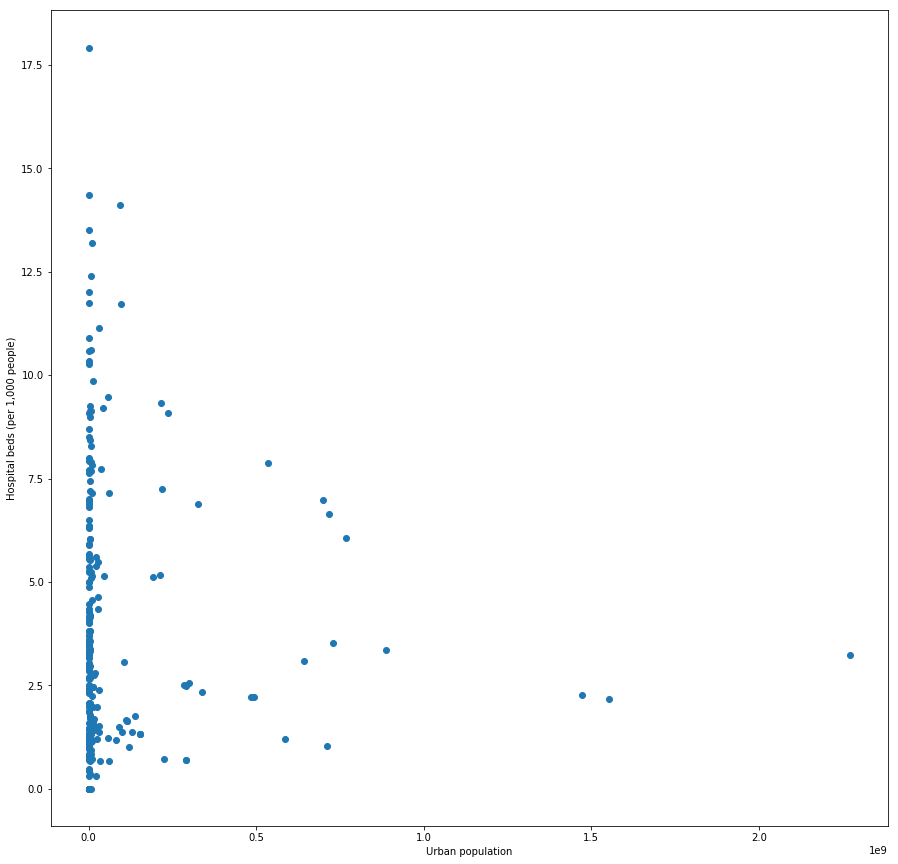

In [8]:
x = df2['Urban population']
y = df2['Hospital beds (per 1,000 people)']
plt.figure(figsize=(15, 15))
plt.scatter(x, y)
plt.xlabel('Urban population')
plt.ylabel('Hospital beds (per 1,000 people)')